# Variação do BitCoin

Esse notebook demonstra como calcular a variação mensal do bitcoin e exibir num gráfico

In [5]:
# Importações

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from binance.client import Client
import seaborn as sns
import numpy as np

{'month': 'Janeiro', 'start': 588693.0, 'end': 599359.0, 'variation_percent': 1.81}
{'month': 'Fevereiro', 'start': 593197.0, 'end': 499672.0, 'variation_percent': -15.77}
{'month': 'março', 'start': 509701.0, 'end': 472887.0, 'variation_percent': -7.22}
{'month': 'abril', 'start': 485056.0, 'end': 536632.0, 'variation_percent': 10.63}
{'month': 'Maio', 'start': 549579.0, 'end': 623531.0, 'variation_percent': 13.46}


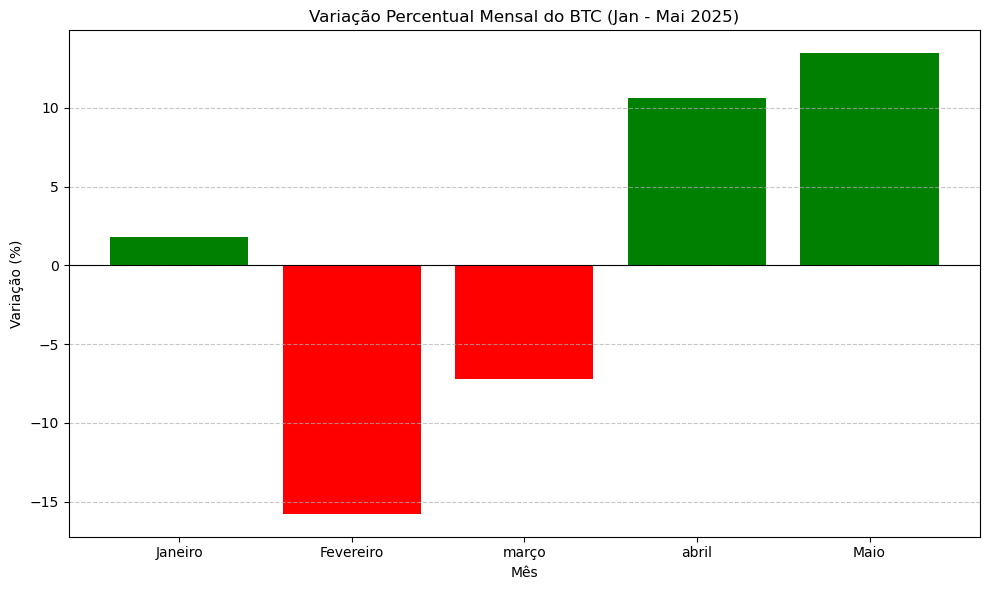

       month     start       end  variation_percent
0    Janeiro  588693.0  599359.0               1.81
1  Fevereiro  593197.0  499672.0             -15.77
2      março  509701.0  472887.0              -7.22
3      abril  485056.0  536632.0              10.63
4       Maio  549579.0  623531.0              13.46


In [12]:
# Inicializa o cliente da Binance (sem chave para dados públicos)
client = Client()

# Coleta os dados de 1º de janeiro a 1º de junho para o par de trddint BTCBRL
symbol = 'BTCBRL'
interval = Client.KLINE_INTERVAL_1DAY
start_str = '1 Jan, 2025'
end_str = '1 Jun, 2025'

klines = client.get_historical_klines(symbol, interval, start_str, end_str)

# Criação do DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume',
           'close_time', 'quote_asset_volume', 'number_of_trades',
           'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']

df = pd.DataFrame(klines, columns=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['close'] = df['close'].astype(float)
df['month'] = df['timestamp'].dt.to_period('M')

# Calcula a variação percentual mês a mês
monthly_returns = []

for month, group in df.groupby('month'):
    first_price = group.iloc[0]['close']
    last_price = group.iloc[-1]['close']
    variation = ((last_price - first_price) / first_price) * 100
    monthly_returns.append({
        'month': str(month),
        'start': round(first_price, 2),
        'end': round(last_price, 2),
        'variation_percent': round(variation, 2)
    })

#Alterando datatas para nome dos meses
meses = ['Janeiro', 'Fevereiro','março','abril','Maio']

for i, item in enumerate(monthly_returns):
    item['month'] = meses[i]
    print(item)
    
# Converte para DataFrame
returns_df = pd.DataFrame(monthly_returns)

# Plotando gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in returns_df['variation_percent']]
plt.bar(returns_df['month'], returns_df['variation_percent'], color=colors)
plt.title('Variação Percentual Mensal do BTC (Jan - Mai 2025)')
plt.ylabel('Variação (%)')
plt.xlabel('Mês')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('btc_variacao_mensal_2025.png')
plt.show()

# Mostrar tabela no terminal (opcional)
print(returns_df)

{'month': 'Janeiro', 'start': 94591.79, 'end': 102429.56, 'variation_percent': 8.29}
{'month': 'Fevereiro', 'start': 100635.65, 'end': 84349.94, 'variation_percent': -16.18}
{'month': 'março', 'start': 86064.53, 'end': 82550.01, 'variation_percent': -4.08}
{'month': 'abril', 'start': 85158.34, 'end': 94172.0, 'variation_percent': 10.58}
{'month': 'Maio', 'start': 96489.91, 'end': 109464.47, 'variation_percent': 13.45}


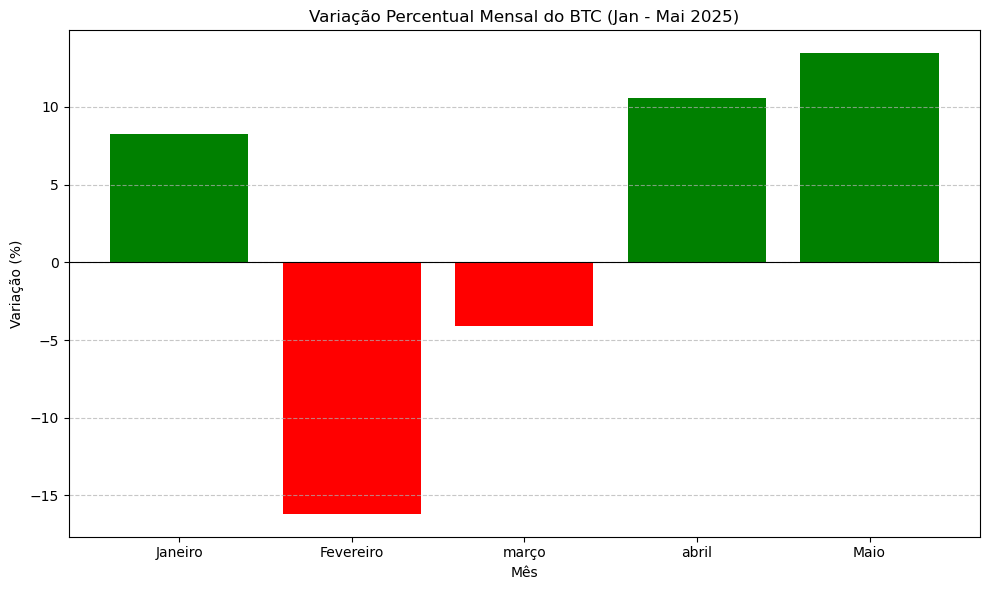

       month      start        end  variation_percent
0    Janeiro   94591.79  102429.56               8.29
1  Fevereiro  100635.65   84349.94             -16.18
2      março   86064.53   82550.01              -4.08
3      abril   85158.34   94172.00              10.58
4       Maio   96489.91  109464.47              13.45


In [14]:
# Inicializa o cliente da Binance (sem chave para dados públicos)
client = Client()

# Coleta os dados de 1º de janeiro a 1º de junho para o par de trddint BTCUSDT
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
start_str = '1 Jan, 2025'
end_str = '1 Jun, 2025'

klines = client.get_historical_klines(symbol, interval, start_str, end_str)

# Criação do DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume',
           'close_time', 'quote_asset_volume', 'number_of_trades',
           'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']

df = pd.DataFrame(klines, columns=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['close'] = df['close'].astype(float)
df['month'] = df['timestamp'].dt.to_period('M')

# Calcula a variação percentual mês a mês
monthly_returns = []

for month, group in df.groupby('month'):
    first_price = group.iloc[0]['close']
    last_price = group.iloc[-1]['close']
    variation = ((last_price - first_price) / first_price) * 100
    monthly_returns.append({
        'month': str(month),
        'start': round(first_price, 2),
        'end': round(last_price, 2),
        'variation_percent': round(variation, 2)
    })

#Alterando datatas para nome dos meses
meses = ['Janeiro', 'Fevereiro','março','abril','Maio']

for i, item in enumerate(monthly_returns):
    item['month'] = meses[i]
    print(item)
    
# Converte para DataFrame
returns_df = pd.DataFrame(monthly_returns)

# Plotando gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in returns_df['variation_percent']]
plt.bar(returns_df['month'], returns_df['variation_percent'], color=colors)
plt.title('Variação Percentual Mensal do BTC (Jan - Mai 2025)')
plt.ylabel('Variação (%)')
plt.xlabel('Mês')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('btc_variacao_mensal_2025.png')
plt.show()

# Mostrar tabela no terminal (opcional)
print(returns_df)